<a href="https://www.kaggle.com/code/kiflys/job-in-data-eda?scriptVersionId=159225396" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime #
from sklearn import preprocessing

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jobs-in-data/jobs_in_data.csv


In [2]:
df = pd.read_csv("/kaggle/input/jobs-in-data/jobs_in_data.csv")
df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


# Check Data Information

look for problems to clean up the data, before managing it into EDA.
such as empty data, the same data or duplicate data, data types, etc

In [3]:
print(df.info())
print("......................")
print(df.count())
print("......................")
print(df.isnull().sum())
print("......................")
print(df.duplicated())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB
None
......................
work_year             9355
job_title             9355
job_category          9355
salary_currency       9355
salary                9355
salary

looking at the information above, the data presented looks clean and has no problems and is ready to export data and analyze data with EDA

# Exploratory Data Analysis

check duplicate data if there is, I will delete duplicate data because I cannot determine the exact data from the data owner and contact him to retrieve the data that will be replaced in dealing with duplicate data

In [4]:
df.shape

(9355, 12)

In [5]:
duplicated_df = df[df.duplicated()]
"number of duplicated",duplicated_df.shape

('number of duplicated', (4014, 12))

the amount of duplicate data is no more than 50% of the total amount of data, then I will delete the duplicate data

In [6]:
df = df.drop_duplicates()
df.head(20)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
5,2023,Data Scientist,Data Science and Research,USD,130000,130000,United States,Senior,Full-time,Remote,United States,M
6,2023,Data Scientist,Data Science and Research,USD,100000,100000,United States,Senior,Full-time,Remote,United States,M
7,2023,Machine Learning Researcher,Machine Learning and AI,USD,224400,224400,United States,Mid-level,Full-time,In-person,United States,M
8,2023,Machine Learning Researcher,Machine Learning and AI,USD,138700,138700,United States,Mid-level,Full-time,In-person,United States,M
9,2023,Data Engineer,Data Engineering,USD,210000,210000,United States,Executive,Full-time,Remote,United States,M


In [7]:
df.count()

work_year             5341
job_title             5341
job_category          5341
salary_currency       5341
salary                5341
salary_in_usd         5341
employee_residence    5341
experience_level      5341
employment_type       5341
work_setting          5341
company_location      5341
company_size          5341
dtype: int64

In [8]:
df.describe() #analisis univariet

,work_year,salary,salary_in_usd
count,5341.000000,5341.000000,5341.000000
mean,2022.682082,145814.937839,146258.409099
std,0.608026,67025.469452,66594.117529
min,2020.000000,14000.000000,15000.000000
25%,2022.000000,97300.000000,98506.000000
50%,2023.000000,140000.000000,140000.000000
75%,2023.000000,186200.000000,186000.000000
max,2023.000000,450000.000000,450000.000000


In [9]:
from matplotlib import pyplot as plt #import matplotlib.pyplot as plt
import seaborn as sns


<Axes: xlabel='job_title'>

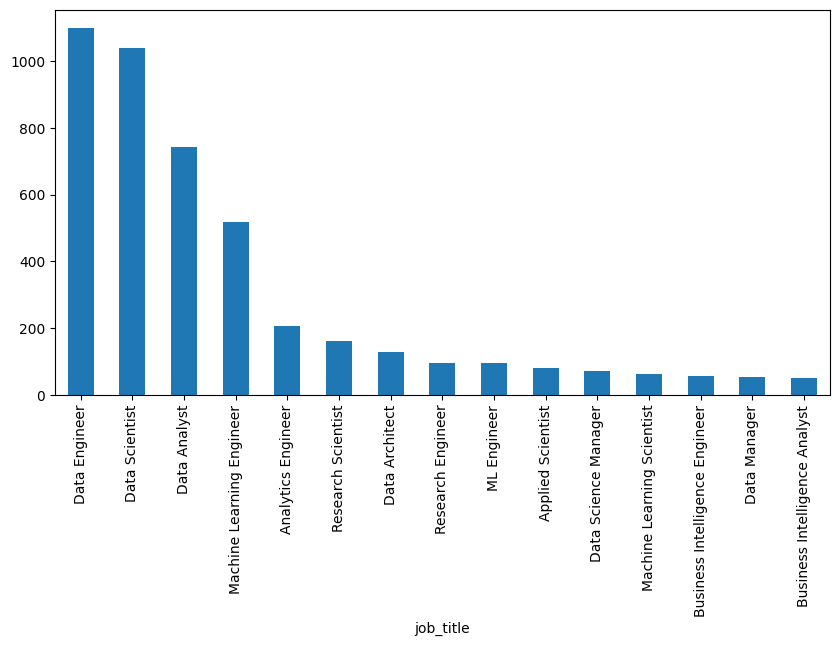

In [10]:
df.job_title.value_counts().nlargest(15).plot(kind="bar",figsize=(10,5))

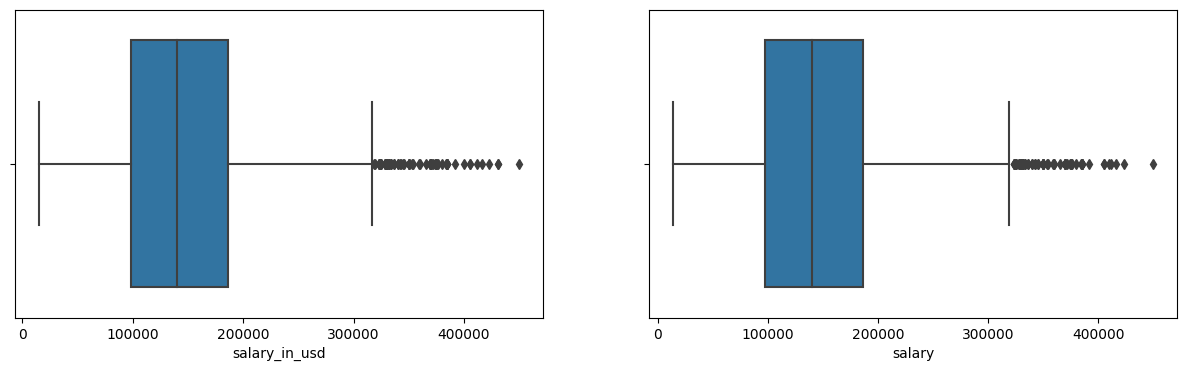

In [11]:
plt.figure(figsize=(15,4))
plt.subplot(121)
sns.boxplot(df, x='salary_in_usd')
plt.subplot(122)
sns.boxplot(df, x='salary');

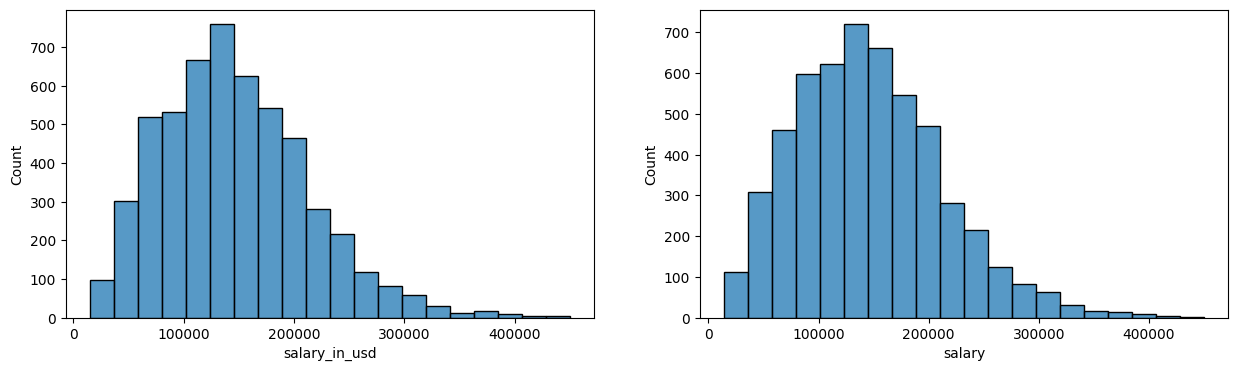

In [12]:
plt.figure(figsize=(15,4))
plt.subplot(121)
sns.histplot(df, x='salary_in_usd', bins=20)
plt.subplot(122)
sns.histplot(df, x='salary', bins=20);

<Axes: xlabel='work_year', ylabel='salary_in_usd'>

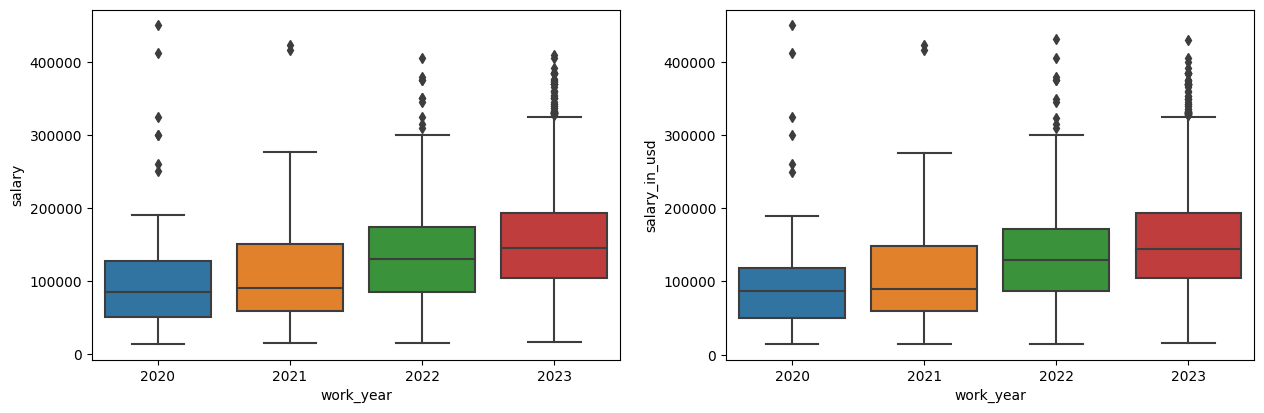

In [13]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.boxplot(df, y='salary', x='work_year')
plt.subplot(222)
sns.boxplot(df, y='salary_in_usd', x='work_year')

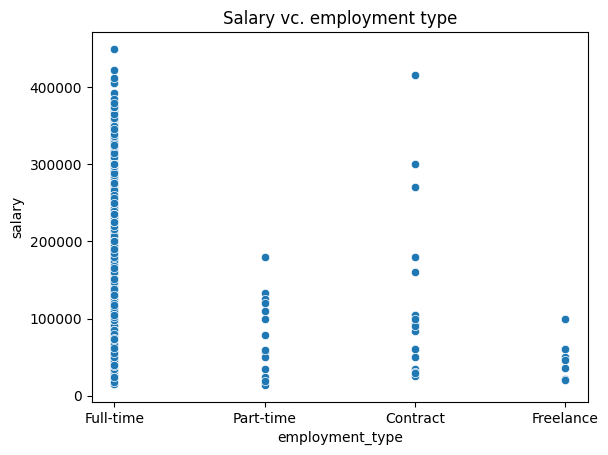

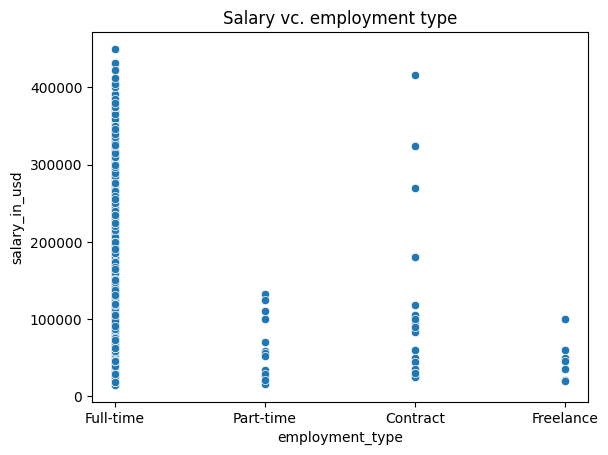

In [14]:
sns.scatterplot(x= 'employment_type', y ='salary', data=df)
plt.title('Salary vc. employment type')
plt.show()

sns.scatterplot(x= 'employment_type', y ='salary_in_usd', data=df)
plt.title('Salary vc. employment type')
plt.show()


/tmp/ipykernel_18/2030403832.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['experience_level_encoded'] = label_encoder.fit_transform(df['experience_level'])
/tmp/ipykernel_18/2030403832.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['company_size_encoded'] = label_encoder.fit_transform(df['company_size'])


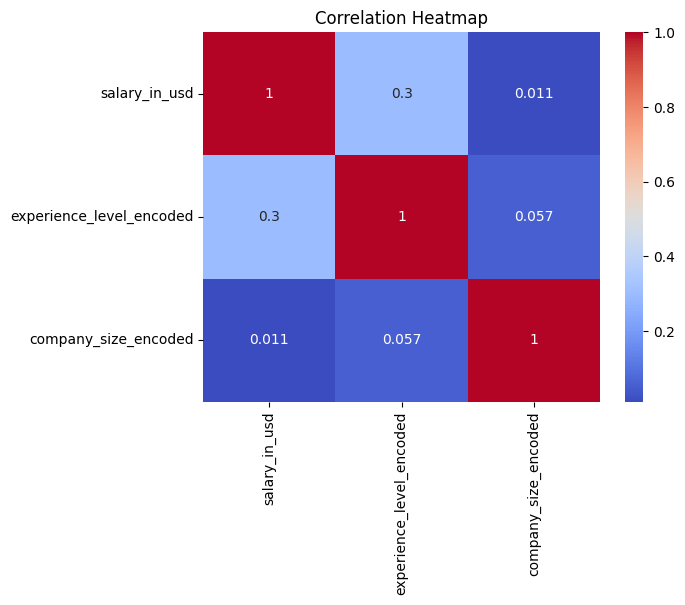

In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['experience_level_encoded'] = label_encoder.fit_transform(df['experience_level'])
df['company_size_encoded'] = label_encoder.fit_transform(df['company_size'])


corr_matrix = df[['salary_in_usd', 'experience_level_encoded', 'company_size_encoded']].corr()
sns.heatmap(corr_matrix, annot = True, cmap ='coolwarm')
plt.title('Correlation Heatmap')
plt.show()